In [102]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

pd.options.mode.chained_assignment = None 

## Step 1: Loading the data, including testing/training split from Project 1
Loading ecommerce data from kaggle (https://www.kaggle.com/prachi13/customer-analytics)

Addressing any missing data issues.

In [103]:
folder = "https://raw.githubusercontent.com/beyenidogan/AdvData/main/Project2/"
file_name="ecommerce_shipping.csv"
file_url=folder+file_name

shipping = pd.read_csv(file_url,error_bad_lines=False)


In [104]:
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN
0,1,D,Flight,4,2,177,3,low,F,44,1233.0,1
1,2,F,Flight,4,5,216,2,low,M,59,3088.0,1
2,3,A,Flight,2,2,183,4,low,M,48,3374.0,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177.0,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484.0,1


In [105]:
shipping.shape

(10999, 12)

In [106]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        9898 non-null   float64
 11  ReachedonTime_YN     10999 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.0+ MB


In [107]:
shipping.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,ReachedonTime_YN
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,9898.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3636.579612,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1636.169391,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1842.000000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4150.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5051.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Step 2: Preparing the dataset
Making sure that all the appropriate variables are converted to categorical variables (as ordinal or one hot) and any necessary feature scaling is done

In [108]:
shipping['Product_importance_S'] = shipping['Product_importance'].replace(['low','medium','high'],[1,2,3])
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN,Product_importance_S
0,1,D,Flight,4,2,177,3,low,F,44,1233.0,1,1
1,2,F,Flight,4,5,216,2,low,M,59,3088.0,1,1
2,3,A,Flight,2,2,183,4,low,M,48,3374.0,1,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177.0,1,2
4,5,C,Flight,2,2,184,3,medium,F,46,2484.0,1,2


In [109]:
shipping = shipping.drop('Product_importance', axis=1)
shipping.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,ReachedonTime_YN,Product_importance_S
0,1,D,Flight,4,2,177,3,F,44,1233.0,1,1
1,2,F,Flight,4,5,216,2,M,59,3088.0,1,1
2,3,A,Flight,2,2,183,4,M,48,3374.0,1,1
3,4,B,Flight,3,3,176,4,M,10,1177.0,1,2
4,5,C,Flight,2,2,184,3,F,46,2484.0,1,2


In [110]:
shipping.shape

(10999, 12)

In [111]:
y = shipping["ReachedonTime_YN"]
y.value_counts()

1    6563
0    4436
Name: ReachedonTime_YN, dtype: int64

In [112]:
X = shipping.drop("ReachedonTime_YN", axis=1)
X.shape

(10999, 11)

In [113]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=0)

In [239]:
# Scaling numeric variables and one-hot encoding the categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Customer_rating','Product_importance_S']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Warehouse_block','Mode_of_Shipment', 'Gender']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
     
X_train_encoded = preprocessor.fit_transform(X_train)

print(X_train_encoded)

[[-0.05053092  1.05358802 -0.36727295 ...  1.          0.
   1.        ]
 [ 1.69650851  1.9060306   0.29454042 ...  0.          1.
   0.        ]
 [-0.92405063 -1.60769614 -0.36727295 ...  0.          0.
   1.        ]
 ...
 [-0.92405063 -0.67208842 -1.02908631 ...  1.          1.
   0.        ]
 [ 0.8229888   0.49222339  0.95635378 ...  0.          0.
   1.        ]
 [-0.05053092  0.32589313 -0.36727295 ...  0.          1.
   0.        ]]


In [240]:
#Repeating the same transformation for the test dataset
X_test_encoded = preprocessor.fit_transform(X_test)

print(X_test_encoded)

[[-0.92294452 -1.22475697 -0.39423768 ...  1.          0.
   1.        ]
 [ 0.85039866  0.75798683  0.88123716 ...  1.          1.
   0.        ]
 [-0.92294452 -0.8490792   4.06992427 ...  1.          1.
   0.        ]
 ...
 [-0.92294452  0.7997288  -1.0319751  ...  0.          1.
   0.        ]
 [-0.92294452 -1.43346685 -1.0319751  ...  1.          1.
   0.        ]
 [-0.92294452  0.36143807 -0.39423768 ...  1.          0.
   1.        ]]


## Step 3: Examining the target attribute. 

Examining and plotting the distribution of the target attribute in the dataset. The target variable here is a binary class, so the counts of the classes are displayed.

In [118]:
y.value_counts()

1    6563
0    4436
Name: ReachedonTime_YN, dtype: int64

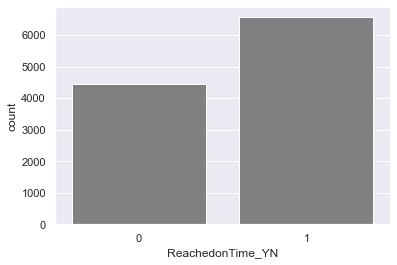

In [156]:
import seaborn as sns
sns.set()
sns.countplot(y, color='gray')


## Step 4: Use two of the following supervised learning algorithms with default parameters 
    
Applying KNN and RandomForest with default parameters:

### Step 4.1: KNN with cross validation 
Calculating precision, recall, and F1 for the training data

In [335]:
# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn= KNeighborsClassifier(n_neighbors=5)

#5-fold cross validation
knn_cv_scores = cross_val_score(knn, X_train_encoded, y_train, cv=5)

print("knn_cv_scores:\n{}".format(knn_cv_scores))
print("knn_cv_scores mean:\n{}".format(np.mean(knn_cv_scores)))

knn_cv_scores:
[0.63409091 0.64488636 0.63181818 0.62727273 0.62876634]
knn_cv_scores mean:
0.633366905266422


Evaluating the model for the test data and generating the confusion matrix:

In [336]:
#Predicting the y_test and displaying the confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(knn, X_test_encoded, y_test, cv=5)

conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

[[543 344]
 [440 873]]


Calculating the metrics for the KNN prediction:

In [337]:
#Calcuating the metrics precision, recall and f1
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       887
           1       0.72      0.66      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.64      0.64      2200
weighted avg       0.65      0.64      0.65      2200



0.6385327198056724

### Step 4.2: RandomForestClassifier with the default parameters
Calculating accuracy for the training & test data using the default settings of Random Forrest Classifier, without and with crossvalidation

In [272]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=2)
forest.fit(X_train_encoded, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train_encoded, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_encoded, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.660


In [333]:
# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
#Random Forest with 5-fold cross validation
rf_cv_scores = cross_val_score(forest, X_train_encoded, y_train, cv=5)

print("rf_cv_scores:\n{}".format(rf_cv_scores))
print("rf_cv_scores mean:\n{}".format(np.mean(rf_cv_scores)))

rf_cv_scores:
[0.67329545 0.64886364 0.66022727 0.65454545 0.65776009]
rf_cv_scores mean:
0.6589383818285183


In [273]:
#default value of n_estimators parameter
print(forest.n_estimators)

100


In [334]:
#Calcuating the metrics precision, recall and f1
from sklearn.metrics import classification_report

y_pred = cross_val_predict(forest, X_test_encoded, y_test, cv=5)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61       887
           1       0.74      0.65      0.69      1313

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



## Step 5: Adjust 2-3 parameters for each model using grid search
    
Applying KNN and RandomForest with GridSearchCV:

### Step 5.1: Generating GridSearch to find the best value of the parameters "n_neighbors", "leaf_size" and "p" for KNN



In [288]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, algorithm="BallTree")

#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, verbose=1)
#Fit the model
best_model = clf.fit(X_train_encoded, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 10 folds for each of 2842 candidates, totalling 28420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best leaf_size: 1
Best p: 2
Best n_neighbors: 27


[Parallel(n_jobs=1)]: Done 28420 out of 28420 | elapsed: 60.8min finished


In [281]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [283]:
leaf_size = list(range(1,25))
n_neighbors = list(range(1,20))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=cv)
#Fit the model
best_model = clf.fit(X_train_encoded, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 8


In [290]:
# accuracy of n_neighbors=27,leaf_size=1, p=2 on testing data 
knn3 = KNeighborsClassifier(n_neighbors=27,leaf_size=1, p=2)
knn3.fit(X_train_encoded, y_train)
print("knn score: {}".format(knn3.score(X_test_encoded, y_test)))

knn score: 0.6409090909090909


In [291]:
# accuracy of n_neighbors=8,leaf_size=1, p=2 on testing data 
knn4 = KNeighborsClassifier(n_neighbors=8,leaf_size=1, p=2)
knn4.fit(X_train_encoded, y_train)
print("knn score: {}".format(knn4.score(X_test_encoded, y_test)))

knn score: 0.6477272727272727


In [295]:
# precision, recall and f1 of knn with n_neighbors=27, leaf_size=1, p=2 on testing data 
from sklearn.metrics import classification_report
print(classification_report(y_test, knn3.predict(X_test_encoded)))

#from sklearn.metrics import roc_auc_score
#y_pred = cross_val_predict(knn, X_test_encoded, y_test, cv=5)
#print(classification_report(y_test, y_pred))
#roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.54      0.67      0.60       887
           1       0.74      0.62      0.67      1313

    accuracy                           0.64      2200
   macro avg       0.64      0.65      0.64      2200
weighted avg       0.66      0.64      0.64      2200



In [296]:
# precision, recall and f1 of knn with n_neighbors=8, leaf_size=1, p=2 on testing data 
from sklearn.metrics import classification_report
print(classification_report(y_test, knn4.predict(X_test_encoded)))

#from sklearn.metrics import roc_auc_score
#y_pred = cross_val_predict(knn, X_test_encoded, y_test, cv=5)
#print(classification_report(y_test, y_pred))
#roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.55      0.72      0.62       887
           1       0.76      0.60      0.67      1313

    accuracy                           0.65      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.68      0.65      0.65      2200



Using 4 different metrics (accuracy, precision, recall, F1) but optimizing for the F1 score

In [203]:
#Applying KNN with neighbors 1 through 25 to find the best value of neighbors
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html

from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": np.arange(1, 26)}

metric_grid= {'acc': 'accuracy','prec':'precision','rec':'recall', 'f1':  'f1'}

#knn_gscv = GridSearchCV(knn, param_grid,cv=5)

knn_gscv = GridSearchCV(knn, param_grid, scoring=metric_grid, refit='f1', return_train_score=True,cv =5)

knn_gscv.fit(X_train_encoded, y_train)

knn_best_param = knn_gscv.best_params_
print(knn_best_param)

{'n_neighbors': 3}


The values of the scores for the n_neighbors=3 are as below (note that n_neighbors=3 corresponds to index=2 of the arrays:

In [205]:
print(knn_gscv.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_acc', 'split1_test_acc', 'split2_test_acc', 'split3_test_acc', 'split4_test_acc', 'mean_test_acc', 'std_test_acc', 'rank_test_acc', 'split0_train_acc', 'split1_train_acc', 'split2_train_acc', 'split3_train_acc', 'split4_train_acc', 'mean_train_acc', 'std_train_acc', 'split0_test_prec', 'split1_test_prec', 'split2_test_prec', 'split3_test_prec', 'split4_test_prec', 'mean_test_prec', 'std_test_prec', 'rank_test_prec', 'split0_train_prec', 'split1_train_prec', 'split2_train_prec', 'split3_train_prec', 'split4_train_prec', 'mean_train_prec', 'std_train_prec', 'split0_test_rec', 'split1_test_rec', 'split2_test_rec', 'split3_test_rec', 'split4_test_rec', 'mean_test_rec', 'std_test_rec', 'rank_test_rec', 'split0_train_rec', 'split1_train_rec', 'split2_train_rec', 'split3_train_rec', 'split4_train_rec', 'mean_train_rec', 'std_train_rec', 'split0_test_f1', 'split1_test_f1

In [206]:
print(knn_gscv.cv_results_['mean_test_acc'][2])

0.6360934027598326


In [209]:
print(knn_gscv.cv_results_['mean_test_prec'][2])

0.705846282704676


In [210]:
print(knn_gscv.cv_results_['mean_test_rec'][2])

0.668952380952381


In [212]:
print(knn_gscv.cv_results_['mean_test_f1'][2])

0.6868905259291924


Visualizing the change in F1 for different values of n_neighbors

In [165]:
param_range=np.arange(1, 26)
print(param_range)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


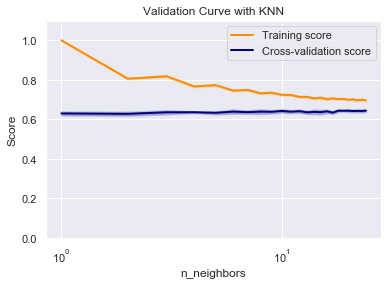

In [292]:
#Visualizing the training and cross-validation F1 scores using KNN with neighbors 1 through 25 
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    knn, X_train_encoded, y_train, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### Step 5.2: Generating GridSearch to find the best value of the parameters 'n_estimators' and 'max_depth' for Random Forest Classifier

In [324]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

# Create the random grid
forest_grid = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'max_features': max_features}
print(forest_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50, None], 'max_features': ['sqrt']}


In [325]:
#Create new forest object
forest_2 = RandomForestClassifier(random_state=2)

#Use GridSearch
forest_grid = GridSearchCV(forest_2, forest_grid, cv=10, verbose=1)

#Fit the model
forest_best_model = forest_grid.fit(X_train_encoded, y_train)

#Print The value of best Hyperparameters
print('Best n_estimators:', forest_best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', forest_best_model.best_estimator_.get_params()['max_depth'])

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  8.6min finished


Best n_estimators: 100
Best max_depth: 10


In [326]:
print(forest_best_model.best_score_)

0.6748487434067638


In [327]:
# accuracy of n_estimators: 100, max_depth: 10 on testing data 
forest_3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=2)

forest_3.fit(X_train_encoded, y_train)

print("Randomforest score: {}".format(forest_3.score(X_test_encoded, y_test)))

randomforest score: 0.6690909090909091


In [328]:
# precision, recall and f1 of randomforestclassifier with n_estimators: 100, max_depth: 10 on testing data 
print(classification_report(y_test, forest_3.predict(X_test_encoded)))


              precision    recall  f1-score   support

           0       0.56      0.85      0.67       887
           1       0.84      0.55      0.66      1313

    accuracy                           0.67      2200
   macro avg       0.70      0.70      0.67      2200
weighted avg       0.73      0.67      0.67      2200

